In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook


### some necessary functions:

In [6]:
d=np.array((1,2))
g=np.array((1,2))

<IPython.core.display.Javascript object>


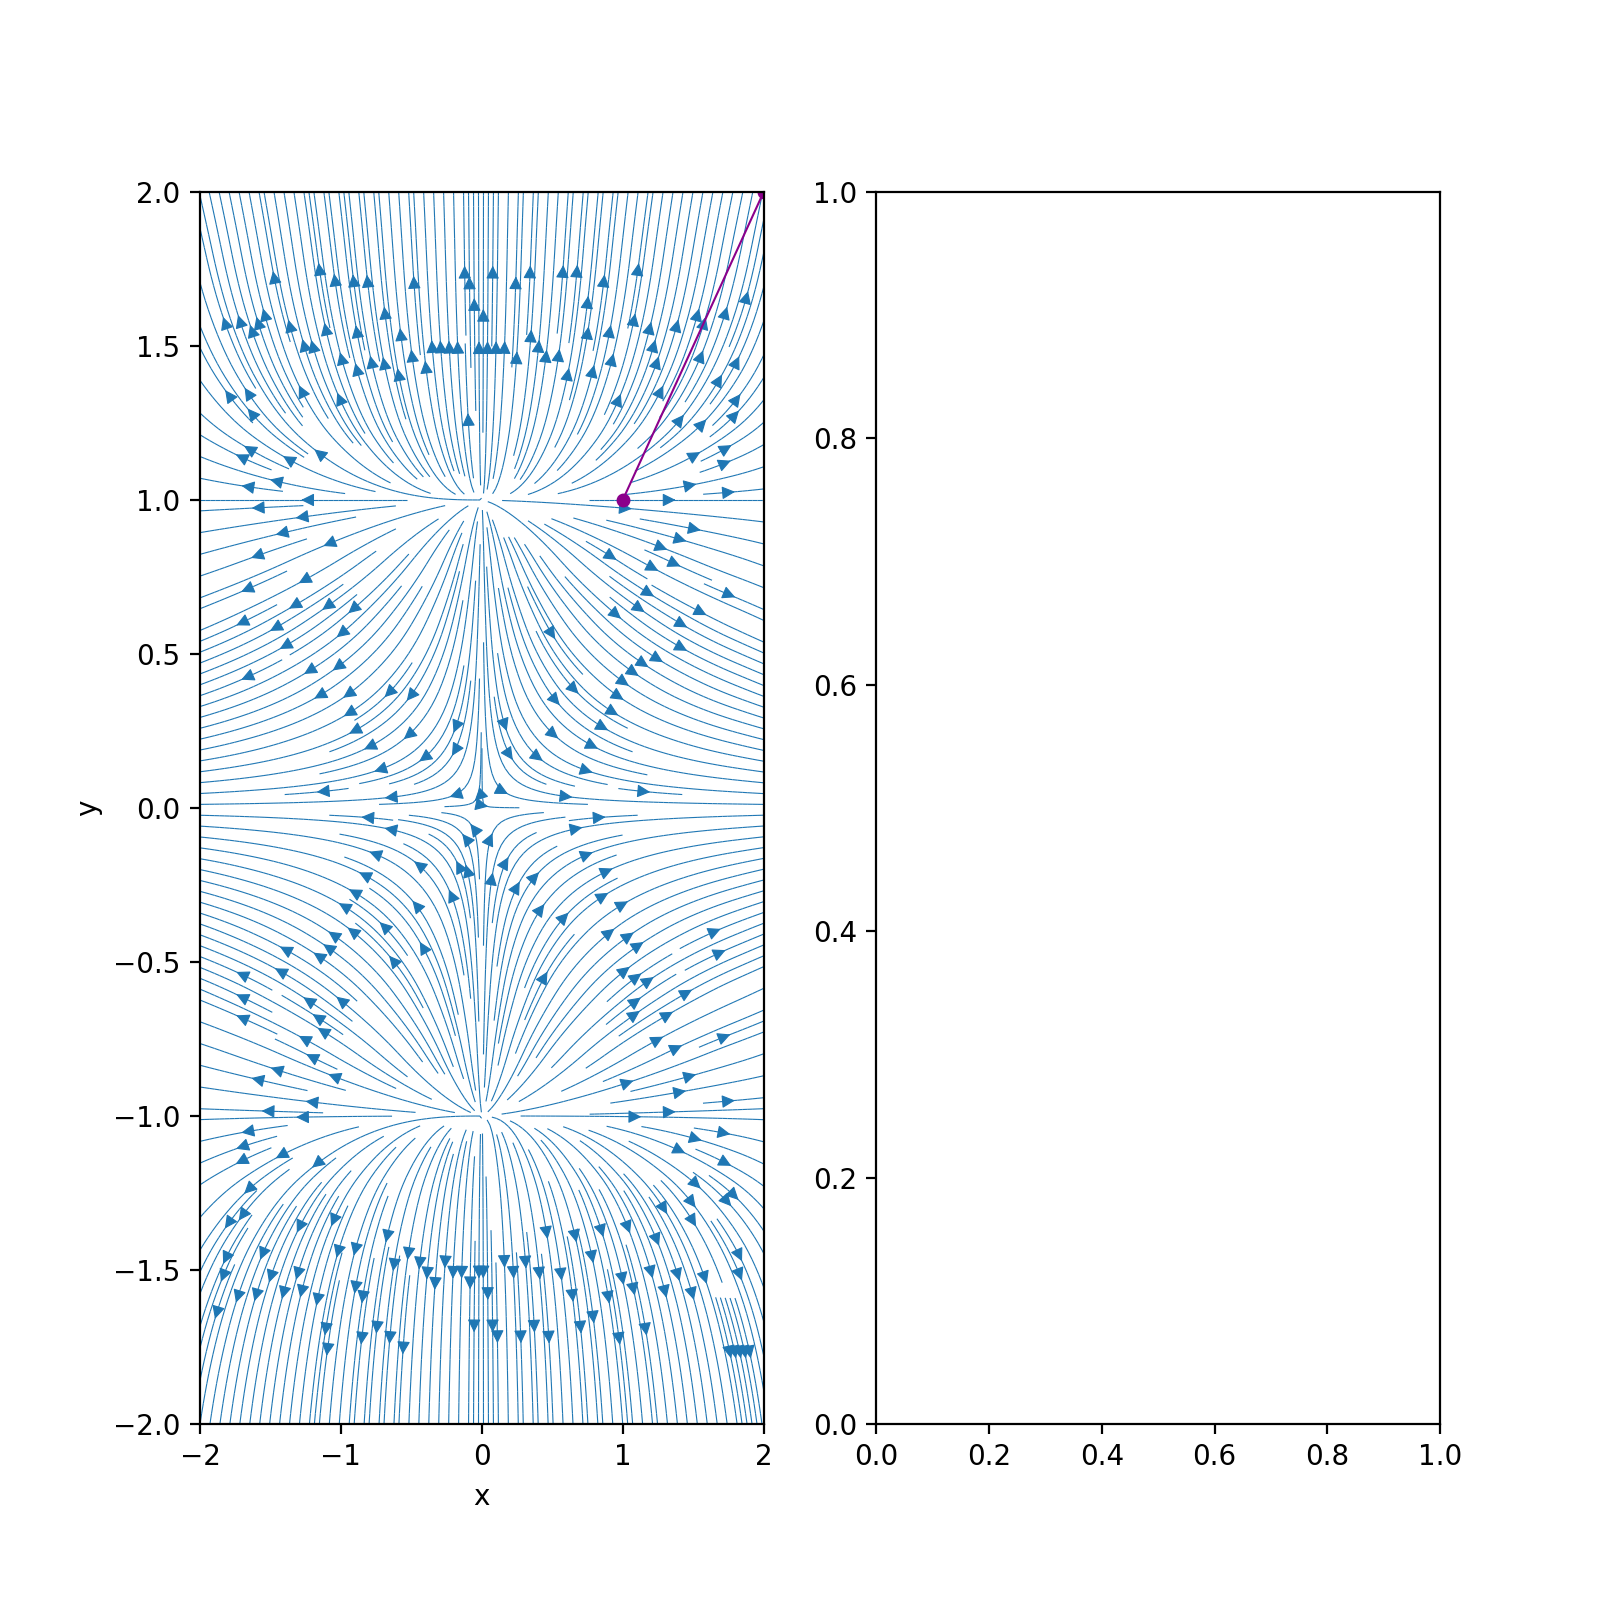

<IPython.core.display.Javascript object>


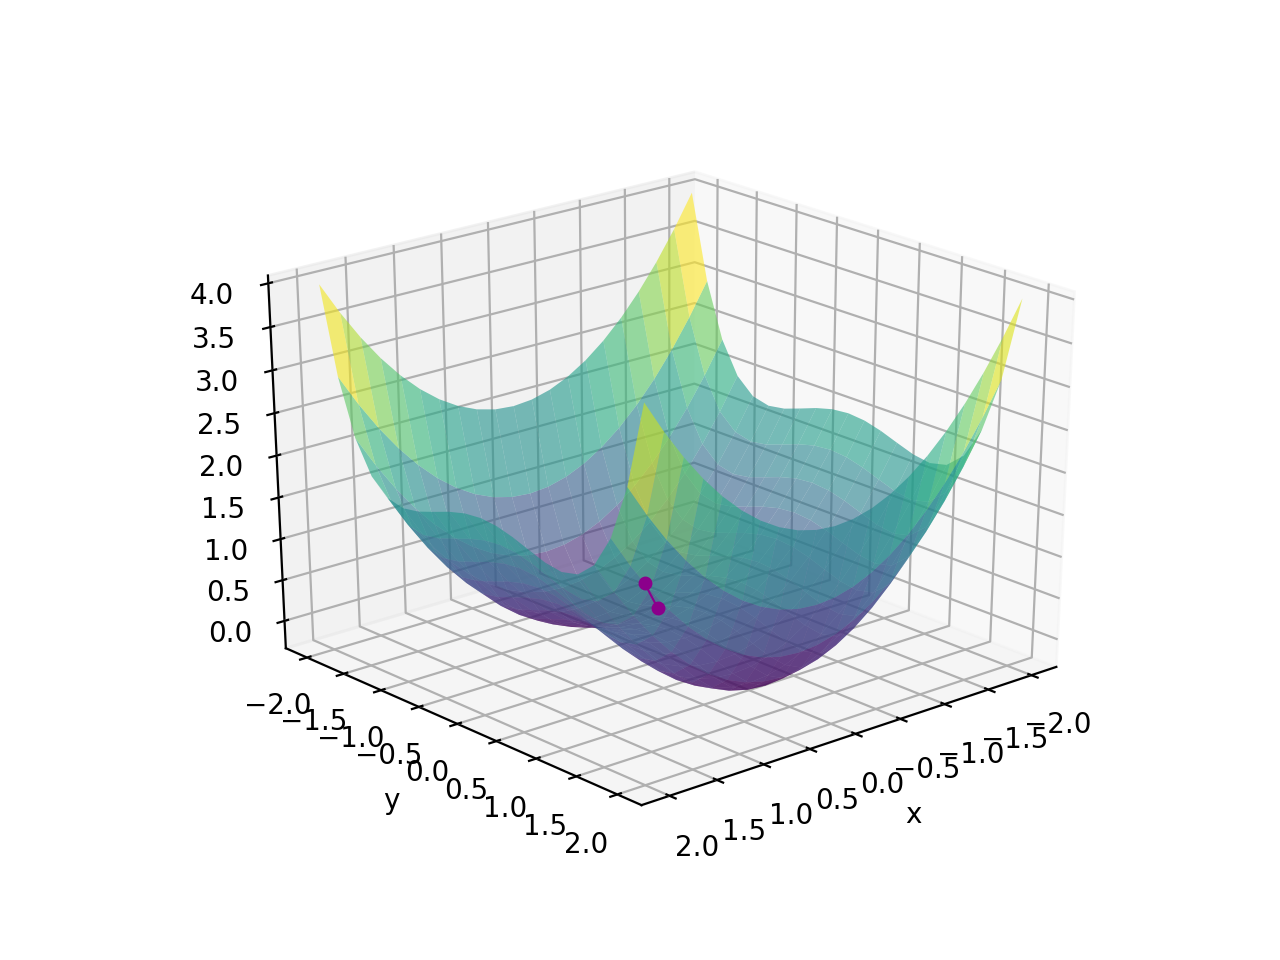

In [49]:
def compute_loss(w):
    if loss_type=='coercive_saddle':
        loss=0.5*w[0]**2+1/4*w[1]**4-0.5*w[1]**2
    else:
        raise ValueError("Unknown losstype!")
    
    return loss

def compute_gradients(w):
# forward pass

    if loss_type=='coercive_saddle':
        grad = np.array([w[0], w[1] ** 3 - w[1]])
    else:
        raise ValueError("Unknown losstype!")
        
    return grad



def make_plot(list_loss,list_x,list_methods,list_steps):
    s=0.2
    limits=np.array((-2,2))
    x_ax = np.arange(limits[0],limits[1]+s, s)  
    y_ax = np.arange(limits[0],limits[1]+s, s)  
    x_ax,y_ax = np.meshgrid(x_ax,y_ax)
    gradient_x=np.zeros((x_ax.shape[0],x_ax.shape[1]))
    gradient_y=np.zeros((y_ax.shape[0],y_ax.shape[1]))
    loss=np.zeros((x_ax.shape[0],x_ax.shape[1]))

    for i in range(x_ax.shape[0]):
        for j in range(x_ax.shape[1]):
            grad=compute_gradients(np.array(x_ax[i,j],y_ax[i,j]))
            gradient_x[i,j]=grad[0]
            gradient_y[i,j]=grad[1]
            loss[i,j]=compute_loss(np.array(x_ax[i,j],y_ax[i,j]))


    #1. Plot Gradient Flow
    plt.subplot(1, 2, 1)
        
    plt.streamplot(x_ax,y_ax,gradient_x,gradient_y, density=4, linewidth='0.4')
    plt.gcf().set_size_inches((8,8))
    plt.show()
    plt.xlabel('x')
    plt.ylabel('y')
    
    #Show iterates
    for i in range (len(list_loss)):
        plt.plot(list_steps[i], '-o',linewidth='0.75',alpha=1, markersize=4)
    plt.legend(list_methods,fontsize=12, loc=1)

    #2. Plot performance over time/steps
    plt.subplot(1, 2, 2)
    for i in range(len(list_loss)):
        plt.plot(list_x[i], list_loss[i])
    plt.legend(list_methods,fontsize=12, loc=1)
    
    #3 .Plot Error Surface
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax = fig.gca(projection='3d')
    ax.plot_surface(x_ax, y_ax, loss,cmap='viridis', 
                    alpha=0.6)  
    # Show iterates
    for i in range(len(list_loss)):
        ax.plot(list_steps[i], list_loss[i],'-o',linewidth='0.75',alpha=1, markersize=4)
    ax.legend(list_methods,fontsize=12, loc=1)

    plt.xlabel('x')
    plt.ylabel('y')



### run methods

In [56]:
no_of_runs=1
iterations=8

global loss_type
loss_type='coercive_saddle'

list_loss = []
list_x = []
list_methods = []
list_steps = []
w_0=np.array((1,1))

GD=True

if GD:
    step_size=0.2
    loss_collector=[]
    x_collector=[]
    for k in range(no_of_runs):
        (GD_steps,_x,_loss)= Gradient_Descent(w_0,iterations,step_size)
        loss_collector.append(_loss)
        x_collector.append(_x)
    GD_loss = [float(sum(col))/len(col) for col in zip(*loss_collector)]
    GD_x =[float(sum(col))/len(col) for col in zip(*x_collector)]   
    
    list_loss.append(GD_loss)
    list_x.append(GD_x)
    list_methods.append('GD')
    list_steps.append(GD_steps)
    
    
make_plot(list_loss,list_x,list_methods,list_steps)


[1 1]


IndexError: too many indices for array

### Gradient Descent

In [57]:
# Run GD (simultaneously)
def Gradient_Descent(w,iterations,step_size):
    iterates=[]
    loss=[]
    x=[]
    for k in range(iterations): 
        #safe information
        iterates.append(w)
        x.append(k)
        loss.append(compute_loss(w))
        
        #take step
        grad=compute_gradients(w)  
        w=w-step_size*grad

    # Plot iterates
    return(iterates,x,loss)